In [9]:
#LAB 11-1
import numpy as np

a = np.array([0,1,2,3,4,5,6,7,8,9])
b = np.array(range(9))
c = np.array(range(0, 9, 2))

print(a, b, c)
print(c.shape, c.ndim, c.dtype, c.size, c.itemsize)

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8] [0 2 4 6 8]
(5,) 1 int32 5 4


In [20]:
a = np.array([[1,2],[2,3],[3,4]]) # 3X2 행렬
print(a.max())
print(a.max(axis=0))

4
[3 4]


In [22]:
a.flatten()

array([1, 2, 2, 3, 3, 4])

In [24]:
list_a = [1,2,3]
list_b = [3,4,5]
c = list_a+list_b
print(c)

[1, 2, 3, 3, 4, 5]


In [25]:
a = np.array([1,2,3])
b = np.array([3,4,5])
a+b

array([4, 6, 8])

In [31]:
a = np.array([[1,2], [3,4]])
b = np.array([[10,20], [30,40]])
print(a+b,'\n\n', a-b,'\n\n', a*b,'\n\n', a/b)

[[11 22]
 [33 44]] 

 [[ -9 -18]
 [-27 -36]] 

 [[ 10  40]
 [ 90 160]] 

 [[0.1 0.1]
 [0.1 0.1]]


In [38]:
a = np.arange(0,24).reshape(4,3,2)
print(a.ndim)

b = np.arange(0,24).reshape(4,6)
print(b)
print(np.transpose(b))

3
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[[ 0  6 12 18]
 [ 1  7 13 19]
 [ 2  8 14 20]
 [ 3  9 15 21]
 [ 4 10 16 22]
 [ 5 11 17 23]]


## **Xarray**

In [39]:
import netCDF4

filename = 'HadISST_sst.nc'

f = netCDF4.Dataset(filename, 'r+', format='NETCDF4')

lon = f.variables['longitude']
lon.cyclic = ''

print(lon)

f.close()

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: Longitude
    standard_name: longitude
    cyclic: 
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used


(array([   363.,   3764.,  17915.,  49400.,  98131., 162676., 188533.,
        114253.,  29571.,   1394.]),
 array([21.51994 , 22.44711 , 23.374277, 24.301447, 25.228617, 26.155785,
        27.082954, 28.010124, 28.937294, 29.864462, 30.791632],
       dtype=float32),
 <BarContainer object of 10 artists>)

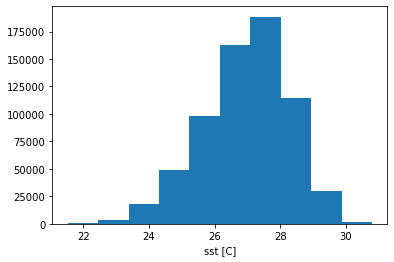

In [10]:
import xarray as xr

da = xr.open_dataset('HadISST_sst.nc')
# print(da)

data = da['sst']
# print(data)

# d1 = data.sel(longitude=slice(-170,-120), latitude=slice(5,-5), time=slice('1901-01-01', '2011-12-31')).mean(axis=1).mean(axis=1)
# d1 = data.sel(latitude=slice(5,-5), time=slice('1901-01-01', '2011-12-31')).mean(axis=0)
d1 = data.sel(longitude=slice(-170,-120), latitude=slice(5,-5), time=slice('1901-01-01', '2011-12-31'))
# print(d1)
# d1.to_netcdf('saved_sst.nc')

d1.plot()

In [11]:
newsst_anom = d1.groupby('time.month')-d1.groupby('time.month').mean(dim='time')
print(newsst_anom)

<xarray.DataArray 'sst' (time: 1332, latitude: 10, longitude: 50)>
array([[[ 0.7301655 ,  0.755785  ,  0.8193245 , ...,  0.61483574,
          0.5749645 ,  0.55524063],
        [ 0.73876953,  0.766613  ,  0.82613564, ...,  0.631073  ,
          0.5964527 ,  0.5785713 ],
        [ 0.8350811 ,  0.8775749 ,  0.9408226 , ...,  0.6718483 ,
          0.6560688 ,  0.64722633],
        ...,
        [ 0.964695  ,  0.99440575,  1.0487003 , ...,  0.6307106 ,
          0.63962364,  0.6283264 ],
        [ 0.9090729 ,  0.92781067,  0.9615612 , ...,  0.5734558 ,
          0.57268333,  0.5537987 ],
        [ 0.8950672 ,  0.91098976,  0.9447117 , ...,  0.5519886 ,
          0.54782486,  0.52848816]],

       [[ 0.24440765,  0.23512268,  0.22270393, ..., -0.02900124,
         -0.07191086, -0.08567047],
        [ 0.24330139,  0.23566246,  0.22311401, ..., -0.00819588,
         -0.05113983, -0.06608391],
        [ 0.25639153,  0.2755394 ,  0.30456352, ...,  0.01958656,
         -0.00839233, -0.03106499],


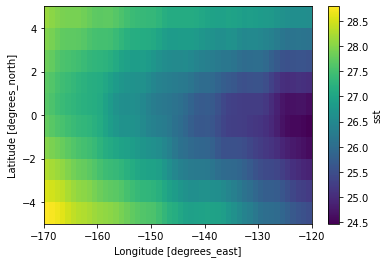

In [14]:
import matplotlib.pyplot as plt

# d1.plot(cmap=plt.cm.Blues)
d1.sel(time=slice('2010-1-1','2010-12-31')).mean(axis=0).plot()